In [17]:
#导入所需模块
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [18]:
(x_img_train,y_label_train),\
(x_img_test,y_label_test) = cifar10.load_data()

In [19]:
print('train data::',"images:",x_img_train.shape,"labels:",y_label_train.shape)
print('test data::',"images:",x_img_test.shape,"labels:",y_label_test.shape)

train data:: images: (50000, 32, 32, 3) labels: (50000, 1)
test data:: images: (10000, 32, 32, 3) labels: (10000, 1)


In [20]:
#将图像images的数字标准化
x_img_train_normalize = x_img_train.astype('float')/255.0
x_img_test_normalize = x_img_test.astype('float')/255.0

In [21]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)    #真实值是几，第几个数字就是1
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [22]:
#导入所需模块
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D,ZeroPadding2D

In [23]:
#建立keras的Sequential模型
model = Sequential()

In [24]:
#建立卷积层1
model.add(Conv2D(filters = 32,              #建立32个滤镜
                kernel_size = (3,3),          #每一个滤镜3*3大小
                input_shape = (32,32,3),      #第一，二维：代表输入图像形状为32*32，第三维：彩色
                activation = 'relu',           #设置relu激活函数
                padding = 'same'))       

In [25]:

model.add(Dropout(rate = 0.25))

In [26]:
#建立池化层1
model.add(MaxPooling2D(pool_size = (2,2)))

In [27]:
#建立卷积层2
model.add(Conv2D(filters = 64,              #建立64个滤镜
                kernel_size = (3,3),          #每一个滤镜3*3大小
                padding = 'same',             #此设置让卷积运算产生的卷积图像大小不变
                activation = 'relu'))         #设置relu激活函数

In [28]:
#将Dropout（0.25）层加入模型中
model.add(Dropout(0.25))

In [29]:
#建立池化层2
model.add(MaxPooling2D(pool_size = (2,2)))

In [30]:
#建立平坦层
model.add(Flatten())
model.add(Dropout(rate = 0.25))

In [31]:
#建立隐藏层
model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(rate = 0.25))

In [32]:
#建立输出层
model.add(Dense(10,activation = 'softmax'))

In [33]:
#查看模型的摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

In [34]:
#定义训练方式
model.compile(loss ='categorical_crossentropy',
             optimizer = 'adam',metrics = ['accuracy'])

In [35]:
#将图像images的数字标准化
x_img_train_normalize = x_img_train.astype('float')/255.0
x_img_test_normalize = x_img_test.astype('float')/255.0

In [36]:
#label标签字段进行One-Hot Encoding转换
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)    #真实值是几，第几个数字就是1
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [37]:
#开始训练
train_history = model.fit(x_img_train_normalize,y_label_train_OneHot,
                         validation_split = 0.2,
                         epochs = 10,batch_size = 128,verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 146s 4ms/step - loss: 1.5012 - acc: 0.4607 - val_loss: 1.2738 - val_acc: 0.5833
Epoch 2/10
40000/40000 [==============================] - 142s 4ms/step - loss: 1.1363 - acc: 0.5991 - val_loss: 1.1118 - val_acc: 0.6375
Epoch 3/10
40000/40000 [==============================] - 143s 4ms/step - loss: 0.9822 - acc: 0.6542 - val_loss: 0.9962 - val_acc: 0.6696
Epoch 4/10
40000/40000 [==============================] - 152s 4ms/step - loss: 0.8762 - acc: 0.6919 - val_loss: 0.9439 - val_acc: 0.6992
Epoch 5/10
40000/40000 [==============================] - 142s 4ms/step - loss: 0.7848 - acc: 0.7239 - val_loss: 0.8783 - val_acc: 0.7085
Epoch 6/10
40000/40000 [==============================] - 141s 4ms/step - loss: 0.7017 - acc: 0.7529 - val_loss: 0.8479 - val_acc: 0.7175
Epoch 7/10
40000/40000 [==============================] - 153s 4ms/step - loss: 0.6244 - acc: 0.7815 - val_loss: 0.8290 - 

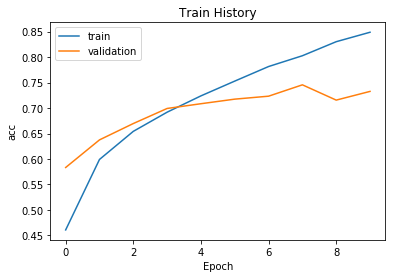

In [41]:
#建立showt_rain_history显示训练过程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc = 'upper left')
    plt.show()
    #画出准确率执行结果
show_train_history(train_history,'acc','val_acc')

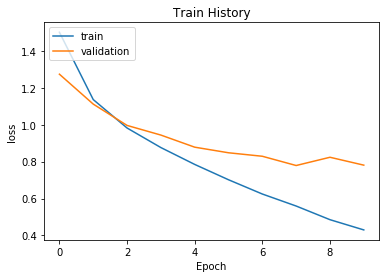

In [42]:
#画出误差执行结果
show_train_history(train_history,'loss','val_loss')

In [43]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose = 0)
scores[1]

0.7281

In [44]:
#执行预测
prediction = model.predict_classes(x_img_test_normalize)

In [45]:
#预测结果
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

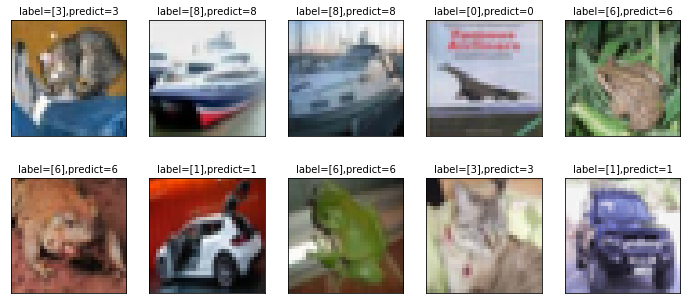

In [46]:
#显示10项预测结果
def plot_images_labels_prediction(images,labels,prediction,idx,num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5,i+1)                     #建立subgraph子图形为5行5列
        ax.imshow(images[idx],cmap = 'binary')         #画出subgraph子图形
        title = 'label=' + str(labels[idx])              #设置子图形title，显示标签字段
        if len(prediction) > 0:                       #如果传入了预测结果
            title += ',predict=' + str(prediction[idx])    #标题title加入预测结果
        
        ax.set_title(title,fontsize = 10)                 #设置子图形标题title的大小
        ax.set_xticks([]);ax.set_yticks([])               #设置不显示刻度
        idx += 1
    plt.show()
plot_images_labels_prediction(x_img_test,y_label_test,prediction, 0,10)

In [50]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [51]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
           5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [52]:
def show_Predicted_Probability(y,prediction,z_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],'predict',label_dict[prediction[i]])
    plt.figure(figsize = (2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+'Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict cat


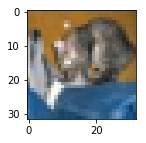

airplaneProbability:0.005594169
automobileProbability:0.001841493
birdProbability:0.017232835
catProbability:0.466733307
deerProbability:0.009657428
dogProbability:0.428216964
frogProbability:0.052669801
horseProbability:0.009037917
shipProbability:0.008038336
truckProbability:0.000977835


In [53]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,0)

label: airplane predict airplane


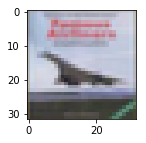

airplaneProbability:0.698053718
automobileProbability:0.001380476
birdProbability:0.054905023
catProbability:0.000341274
deerProbability:0.028253952
dogProbability:0.000052373
frogProbability:0.000156802
horseProbability:0.000158580
shipProbability:0.215969071
truckProbability:0.000728802


In [54]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

In [55]:
prediction.shape

(10000,)

In [68]:
y_label_test.shape

(10000, 1)

In [69]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [70]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames = ['label'],colnames = ['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,797,8,52,11,21,5,19,6,57,24
1,23,779,28,9,3,7,29,5,33,84
2,55,1,660,15,119,48,78,12,9,3
3,19,7,118,376,108,183,145,25,9,10
4,20,1,74,20,789,18,57,14,7,0
5,11,1,91,94,72,623,63,33,6,6
6,3,1,37,11,30,12,900,1,4,1
7,15,0,55,13,117,63,6,724,4,3
8,44,17,27,5,17,8,15,2,850,15
